<a href="https://colab.research.google.com/github/risa1796/Forecasting-Regression-exercises/blob/main/E_Commerce_Jewelry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💍 E-Commerce purchase history from jewelry store
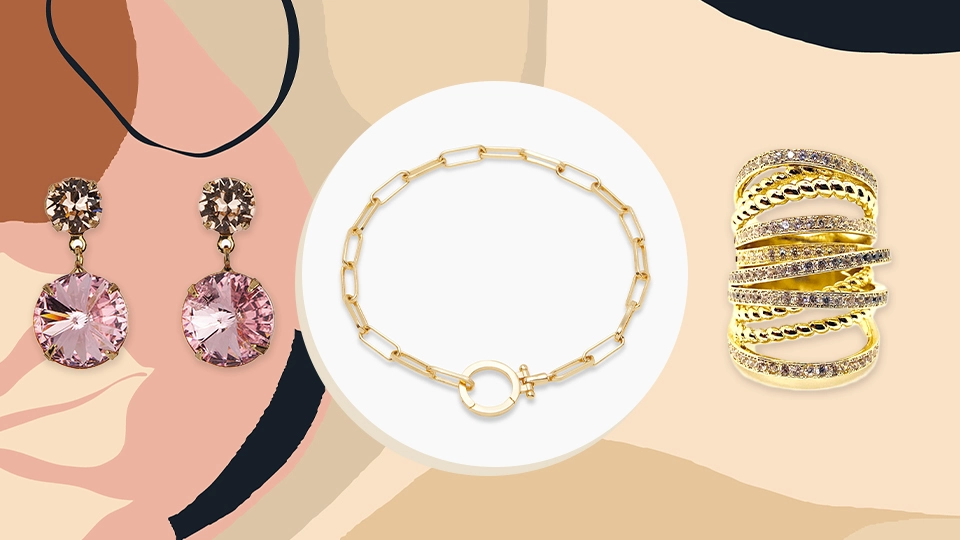

Dataset from https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-jewelry-store

What can I do with this dataset?

- EDA 
- Forecasting total sales 
- Product Recommendation 

## 1. 📥 Data Upload

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df_cols = ['Datetime','OrderID','ProductID','Quantity','CategoryID','CategoryCode','BrandID','USDPrice','UserID','Gender','Color','Metal','Gem']
df = pd.read_csv('/content/drive/MyDrive/딥러닝기초/jewelry.csv',names=df_cols )
df.head(2)

,Datetime,OrderID,ProductID,Quantity,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN


## 2. 🧹 Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   Quantity      95911 non-null  int64  
 4   CategoryID    90559 non-null  float64
 5   CategoryCode  85978 non-null  object 
 6   BrandID       91126 non-null  float64
 7   USDPrice      90559 non-null  float64
 8   UserID        90559 non-null  float64
 9   Gender        47743 non-null  object 
 10  Color         88251 non-null  object 
 11  Metal         90449 non-null  object 
 12  Gem           61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


Check missing values per column

In [4]:
df.isna().sum()

Datetime            0
OrderID             0
ProductID           0
Quantity            0
CategoryID       5352
CategoryCode     9933
BrandID          4785
USDPrice         5352
UserID           5352
Gender          48168
Color            7660
Metal            5462
Gem             34058
dtype: int64

### 2.1 Gender

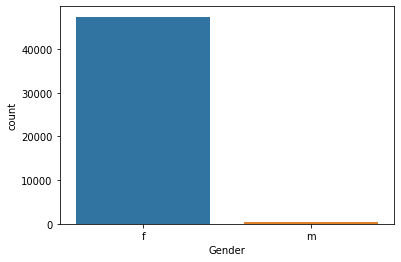

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = 'Gender')

The majority of customers are female, let's replace the missing values with 'f'.

In [6]:
df.Gender.fillna('f', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   Quantity      95911 non-null  int64  
 4   CategoryID    90559 non-null  float64
 5   CategoryCode  85978 non-null  object 
 6   BrandID       91126 non-null  float64
 7   USDPrice      90559 non-null  float64
 8   UserID        90559 non-null  float64
 9   Gender        95911 non-null  object 
 10  Color         88251 non-null  object 
 11  Metal         90449 non-null  object 
 12  Gem           61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


### 2.2 Quantity

In [7]:
df.Quantity.unique()

array([1])

Since there is only one unique value in the 'Quantity' feature, we will drop the column.

In [8]:
df.drop('Quantity',axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  85978 non-null  object 
 5   BrandID       91126 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        95911 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 8.8+ MB


### 2.3 USD Price & User ID

In [9]:
df.USDPrice.isna().sum()

5352

In [10]:
print(df[df['USDPrice'].isna()].Gem.unique())
print(df[df['USDPrice'].isna()].Metal.unique())
print(df[df['USDPrice'].isna()].BrandID.unique())

[nan]
[nan]
[1.55061295e+18 1.32515621e+18 1.51591563e+18 ... 1.51591563e+18
 1.51591563e+18 1.51591563e+18]


In [11]:
df[df['USDPrice'].isna()].BrandID.value_counts()

1.515916e+18    147
1.515916e+18    104
1.515916e+18     74
1.515916e+18     37
1.515916e+18     34
               ... 
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
Name: BrandID, Length: 2530, dtype: int64

In [12]:
df[df['BrandID']==1515915625368881664.000000].describe()

,OrderID,ProductID,CategoryID,BrandID,USDPrice,UserID
count,3.400000e+01,3.400000e+01,0.0,3.400000e+01,0.0,0.0
mean,2.638980e+18,1.511337e+18,NaN,1.515916e+18,NaN,NaN
std,3.443835e+16,2.699059e+16,NaN,2.598498e+02,NaN,NaN
min,2.532276e+18,1.358585e+18,NaN,1.515916e+18,NaN,NaN
25%,2.625246e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
50%,2.657495e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
75%,2.661770e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
max,2.676981e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN


There is Order ID but no price and no user ID ?

What we are interested is eventually the sales and not the number of orders. 

Let's delete rows with missing values in USDPrice and UserID.

In [13]:
new_df = df[df['USDPrice'].notna() & df['UserID'].notna()]

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  80626 non-null  object 
 5   BrandID       85774 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 9.0+ MB


### 2.4 Category Code

We will fill missing values with 'other'

In [15]:
new_df.CategoryCode.fillna('other', inplace=True)

In [16]:
new_df.CategoryCode.value_counts()

jewelry.earring       29052
jewelry.ring          28300
jewelry.pendant       13088
other                  9933
jewelry.bracelet       6188
jewelry.necklace       2361
jewelry.brooch         1288
jewelry.souvenir        170
electronics.clocks      167
jewelry.stud             12
Name: CategoryCode, dtype: int64

### 2.5 Brand ID

Brands IDs are integers. We will fill missing values with -1.

In [17]:
new_df['BrandID'].fillna('-1',inplace=True)

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  90559 non-null  object 
 5   BrandID       90559 non-null  object 
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


### 2.6 Gem & Metal & Color

Replace missing values with 'unknown'

In [19]:
new_df['Gem'].unique()

array(['diamond', nan, 'sapphire', 'amethyst', 'fianit', 'pearl',
       'quartz', 'topaz', 'garnet', 'quartz_smoky', 'ruby', 'agate',
       'mix', 'citrine', 'emerald', 'amber', 'chrysolite', 'chrysoprase',
       'nanocrystal', 'turquoise', 'sitall', 'corundum_synthetic',
       'coral', 'onyx', 'nacre', 'spinel', 'tourmaline',
       'emerald_geothermal', 'garnet_synthetic', 'rhodolite',
       'sapphire_geothermal'], dtype=object)

In [20]:
for i in ('Color','Metal','Gem'):
  if i == 'Color':
    new_df[i].fillna('unknown-color',inplace=True)
  else:
    new_df[i].fillna('unknown',inplace=True)

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  90559 non-null  object 
 5   BrandID       90559 non-null  object 
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         90559 non-null  object 
 10  Metal         90559 non-null  object 
 11  Gem           90559 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


Now we have new dataset with no missing values!

## 3. 📊 EDA

### 3.1 Color

red              69511
white            15286
yellow            3388
unknown-color     2372
black                2
Name: Color, dtype: int64


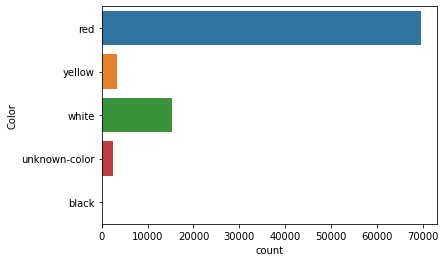

In [22]:
print(new_df.Color.value_counts())
sns.countplot(y ='Color', data = new_df)

> Red color is most popular.

### 3.2 Metal types per Brand ID

gold        89082
silver       1365
unknown       110
platinum        2
Name: Metal, dtype: int64


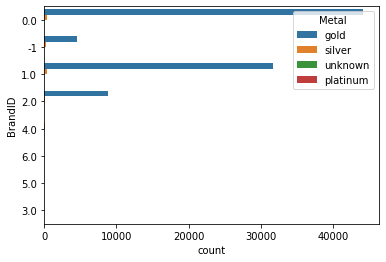

In [23]:
print(new_df.Metal.value_counts())
sns.countplot(y ='BrandID', hue = "Metal", data = new_df)

> Gold is most popular.

### 3.3 Gem

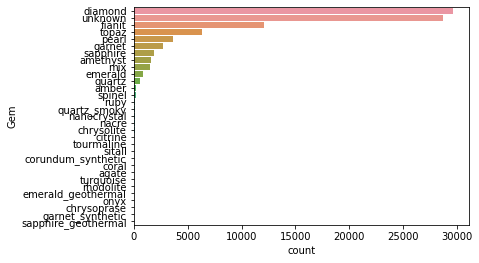

In [24]:
sns.countplot(data = new_df, y = 'Gem', order = new_df['Gem'].value_counts().index)

> Diamond is most popular.

### 3.4 Category Code

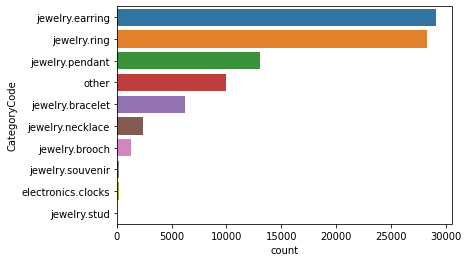

In [25]:
sns.countplot(data = new_df, y = 'CategoryCode', order = new_df['CategoryCode'].value_counts().index)

> Most of the customers have bought earrings followed by rings.

### 3.5 Brand ID

0.0    44600
1.0    32022
2.0     8966
-1      4785
4.0       65
3.0       58
6.0       56
5.0        7
Name: BrandID, dtype: int64


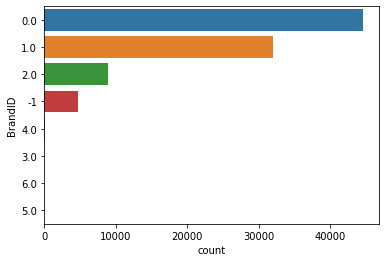

In [26]:
print(new_df.BrandID.value_counts())
sns.countplot(data = new_df, y = 'BrandID', order = new_df['BrandID'].value_counts().index)

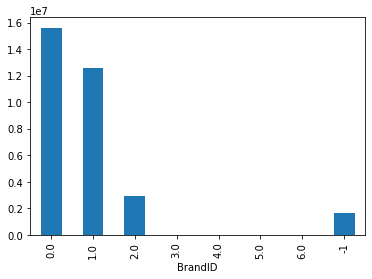

In [27]:
new_df.groupby('BrandID').USDPrice.sum().plot.bar()

> Brand ID 0 is most popular and reached the highest sales.

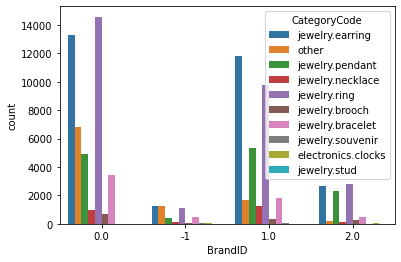

In [28]:
sns.countplot(x ='BrandID', hue = "CategoryCode", data = new_df[new_df['BrandID'].astype(int)<= 2])

> Customers like rings from Brand ID 0 the most. Earrings from Brand ID 1 seem popular. 

### 3.6 Year-Month Difference

In [29]:
year_df = new_df.copy()

In [30]:
year_df['year_month'] = year_df['Datetime'].apply(lambda x: x[:7])
year_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem,year_month
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,f,red,gold,diamond,2018-12
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1.806829e+18,other,-1,212.14,1.515916e+18,f,yellow,gold,unknown,2018-12
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire,2018-12
3,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond,2018-12
4,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst,2018-12


In [31]:
sum_year_month = pd.pivot_table(year_df, 
                         index='year_month',
                         columns='CategoryCode',
                         values='USDPrice',
                         aggfunc='sum')

sum_year_month

CategoryCode,electronics.clocks,jewelry.bracelet,jewelry.brooch,jewelry.earring,jewelry.necklace,jewelry.pendant,jewelry.ring,jewelry.souvenir,jewelry.stud,other
year_month,,,,,,,,,,
2018-12,885.07,3000.60,464.20,14267.00,2024.24,2114.12,5588.19,NaN,NaN,5592.35
2019-01,354.80,15508.98,297.51,76877.03,3802.75,18846.08,58574.38,397.82,NaN,16812.56
2019-02,4953.26,27611.79,2137.20,74824.63,3646.36,17345.04,87290.73,10.27,NaN,22467.61
2019-03,302.05,19521.63,829.54,69827.40,9226.97,13373.17,79287.08,44.75,NaN,24476.95
2019-04,1681.92,23887.16,11097.51,64861.95,5528.89,11060.43,79404.55,20.54,NaN,31538.73
2019-05,2525.76,18198.81,1067.91,56246.11,9577.67,9659.99,95789.09,NaN,NaN,22931.64
2019-06,340.41,25298.40,1239.79,63376.18,2365.35,9071.70,106018.56,19.72,NaN,31348.17
2019-07,2449.05,33645.63,1497.44,91043.87,17903.26,19815.48,133635.20,6.71,353.29,37289.75
2019-08,NaN,44531.18,1296.99,129724.82,6707.62,21338.03,152440.11,NaN,NaN,51722.42


In [32]:
sum_year_month.fillna(0, inplace=True)

#### 2019 & 2020

In [33]:
sum_year_month.reset_index(inplace=True)

In [34]:
sum_year_month['year'] = sum_year_month.year_month.apply(lambda x: x[:4])

df2019 = sum_year_month[sum_year_month['year']=='2019']
df2020 = sum_year_month[sum_year_month['year']=='2020']

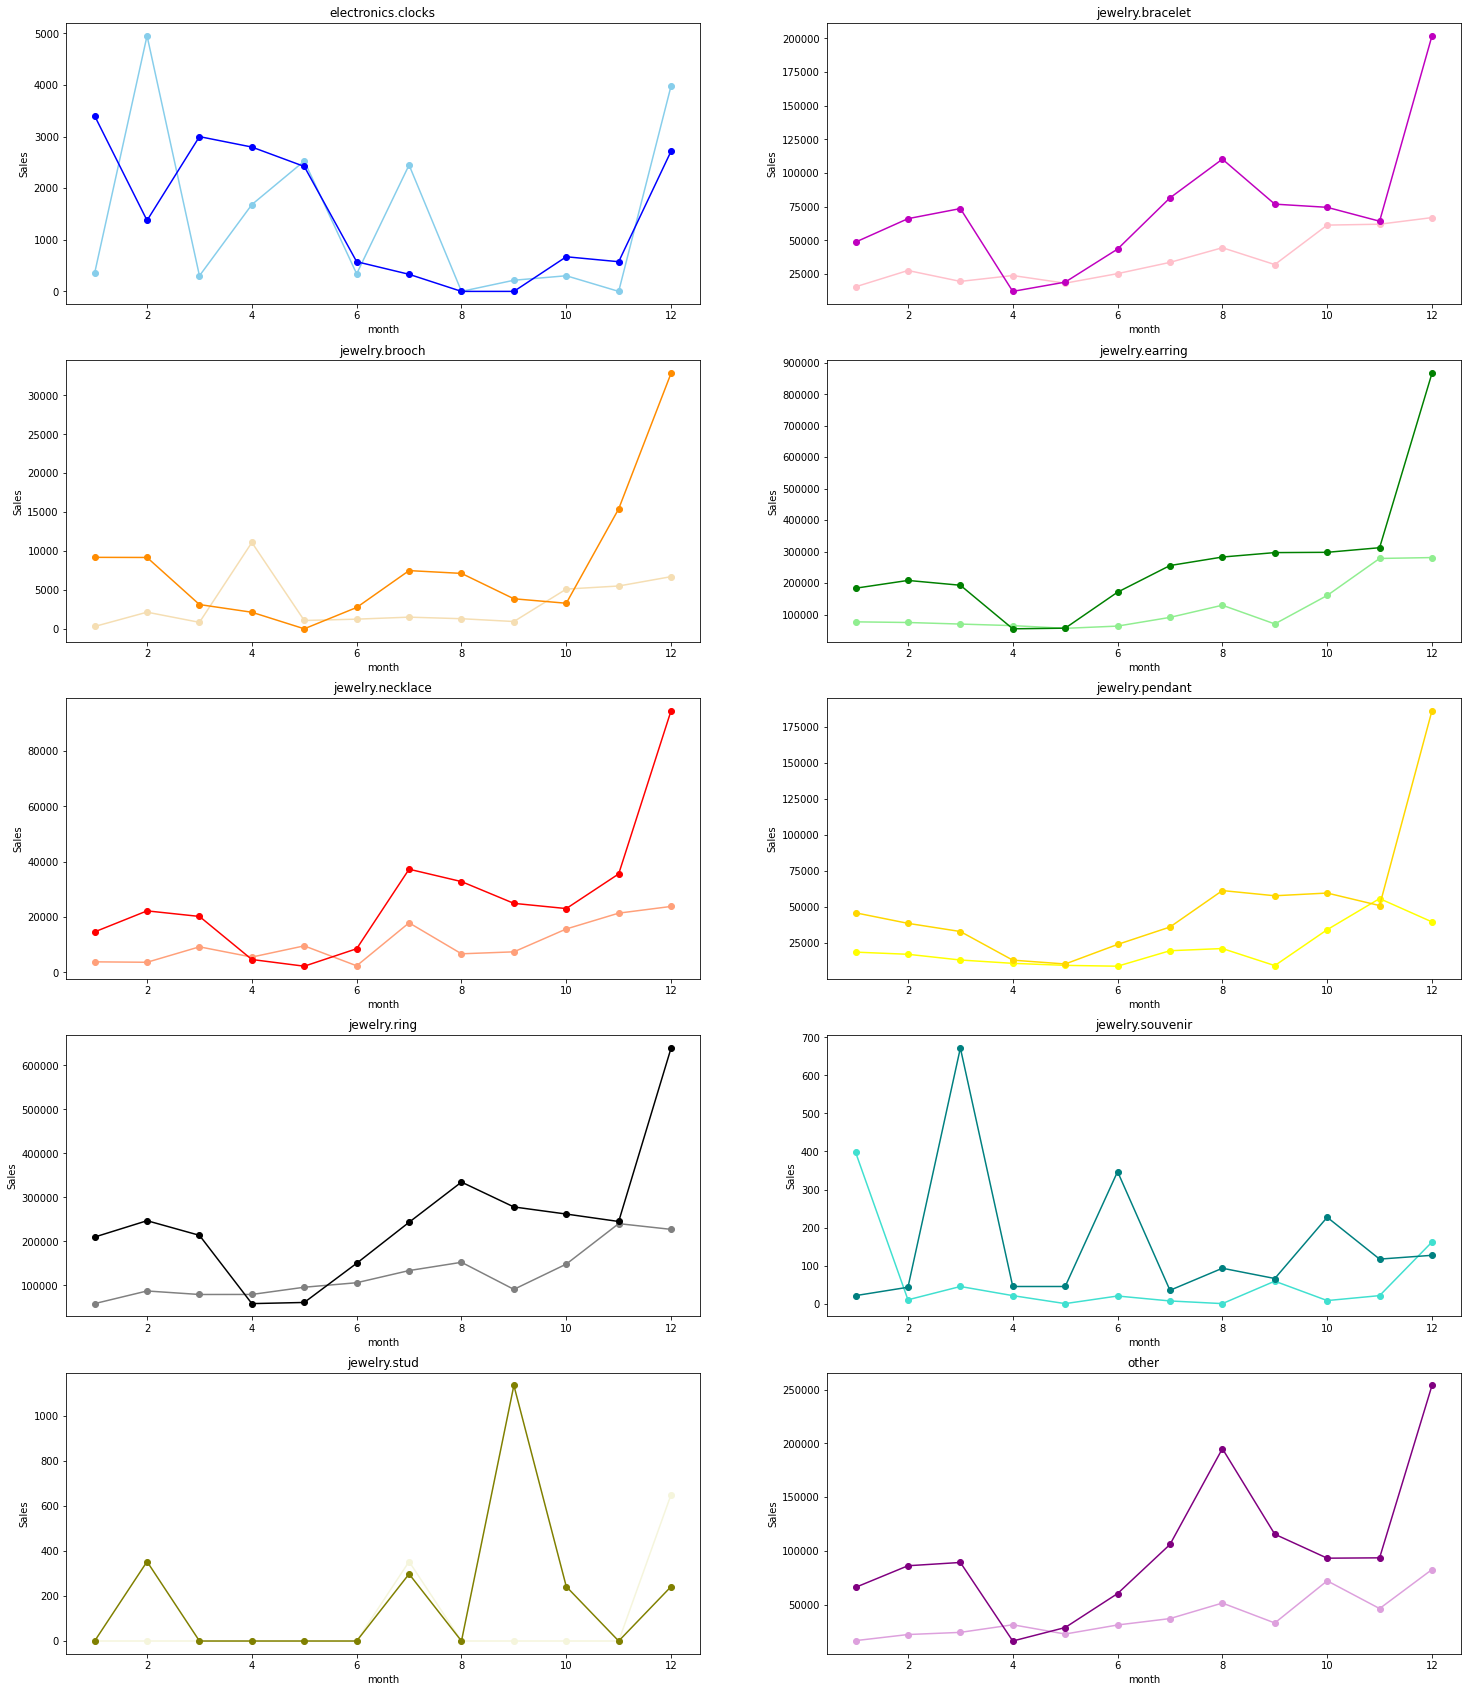

In [35]:
jewelry_types = df2020.columns[1:-1]
jewelry_types

x = range(1,13)

fig=plt.figure(figsize=(25,30))

colors_dict = {'skyblue':'blue','pink':'m','wheat':'darkorange','lightgreen':'green','lightsalmon':'red','yellow':'gold','gray':'black','turquoise':'teal','beige':'olive','plum':'purple'}

for i in range(1, 11):
    plt.subplot(5, 2, i)
    typ = jewelry_types[i-1]

    y1= [round(x) for x in list(df2019[typ])]
    y2= [round(x) for x in list(df2020[typ])]

    color1 = list(colors_dict.keys())[i-1]
    color2 = colors_dict[color1]
    plt.plot(x, y1, label = "Year 2019", marker='o', color=color1)
    plt.plot(x, y2, label = "Year 2020", marker='o', color=color2)
    plt.title(typ)
    plt.xlabel("month")
    plt.ylabel("Sales")


plt.show()

## 4. 🔮 Total sales Forecasting

### 4.1 Data Preprocessing

In [36]:
new_df['Datetime'] = new_df.Datetime.apply(lambda x : x[:10])
new_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01,1924719191579951782,1842195256808833386,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,f,red,gold,diamond
1,2018-12-01,1924899396621697920,1806829193678291446,1.806829e+18,other,-1,212.14,1.515916e+18,f,yellow,gold,unknown
2,2018-12-02,1925511016616034733,1842214461889315556,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02,1925626951238681511,1835566849434059453,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02,1925740842841014667,1873936840742928865,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst


In [37]:
from datetime import datetime

new_df['Datetime'] = new_df['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datetime      90559 non-null  datetime64[ns]
 1   OrderID       90559 non-null  int64         
 2   ProductID     90559 non-null  int64         
 3   CategoryID    90559 non-null  float64       
 4   CategoryCode  90559 non-null  object        
 5   BrandID       90559 non-null  object        
 6   USDPrice      90559 non-null  float64       
 7   UserID        90559 non-null  float64       
 8   Gender        90559 non-null  object        
 9   Color         90559 non-null  object        
 10  Metal         90559 non-null  object        
 11  Gem           90559 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 11.0+ MB


In [38]:
new_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01,1924719191579951782,1842195256808833386,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,f,red,gold,diamond
1,2018-12-01,1924899396621697920,1806829193678291446,1.806829e+18,other,-1,212.14,1.515916e+18,f,yellow,gold,unknown
2,2018-12-02,1925511016616034733,1842214461889315556,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02,1925626951238681511,1835566849434059453,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02,1925740842841014667,1873936840742928865,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst


Total sum of price per day

In [39]:
sales_df =  pd.pivot_table(new_df, 
                 index= 'Datetime' ,
                 values= 'USDPrice'  ,
                 aggfunc= 'sum' ).reset_index()

sales_df.head()

,Datetime,USDPrice
0,2018-12-01,773.65
1,2018-12-02,897.47
2,2018-12-03,978.85
3,2018-12-04,3486.05
4,2018-12-05,1246.58


In [40]:
sales_df.sort_values('Datetime',inplace=True)

### 4.2 Plot history

In [41]:
import numpy as np

# sns.regplot cant read date type in x so ....
sales_df['Time'] = np.arange(len(sales_df.index))

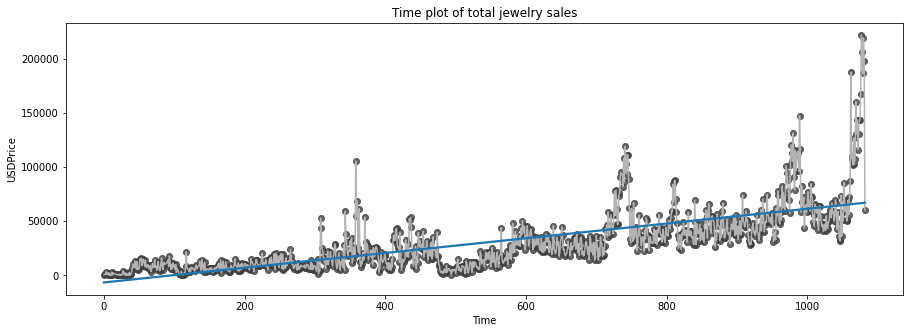

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(sales_df['Time'], sales_df["USDPrice"],  color='0.7')
ax = sns.regplot(sales_df['Time'], sales_df["USDPrice"],  ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of total jewelry sales');

In [43]:
print(f'Total number of days in sales_df: {sales_df.Time.max()} days')

Total number of days in sales_df: 1082 days


Let's print the first 5 rows and the last 5 rows in sales_df.

In [44]:
display(sales_df.head())
display(sales_df.tail())

,Datetime,USDPrice,Time
0,2018-12-01,773.65,0
1,2018-12-02,897.47,1
2,2018-12-03,978.85,2
3,2018-12-04,3486.05,3
4,2018-12-05,1246.58,4


,Datetime,USDPrice,Time
1078,2021-11-27,206071.70,1078
1079,2021-11-28,186474.59,1079
1080,2021-11-29,219555.01,1080
1081,2021-11-30,197417.90,1081
1082,2021-12-01,60113.20,1082


What happened in the last day?? Probably data not fully updated.

In [45]:
sales_df.drop('Time',axis=1,inplace=True)

### 4.3 Convert to Time-Series problem

In [46]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

We will train a model with data from the past 30 days to predict sales of 60 days ahead! 

In [47]:
window = 30
lag = 60
series = series_to_supervised(sales_df.drop('Datetime', axis=1), window=window, lag=lag)
series.head()

,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t),USDPrice(t+60)
30,773.65,897.47,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,...,1234.01,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,12764.49
31,897.47,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,...,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,14353.13
32,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,...,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,8185.48
33,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,313.43,...,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,51.92,17748.04
34,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,313.43,2443.00,...,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,51.92,1045.02,12493.57


### 4.4 Data Split

In [48]:
from sklearn.model_selection import train_test_split

lag_size= lag

# Label
labels_col = 'USDPrice(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(series, labels.values, test_size=0.2, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
print('Test set shape', X_test.shape)
X_train.head()

Train set shape (476, 31)
Validation set shape (318, 31)
Test set shape (199, 31)


,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-9),USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t)
815,41558.62,28410.53,41806.85,39412.43,56162.33,44658.92,38351.92,38208.81,31200.34,30898.30,...,52621.30,59787.40,58571.98,84109.31,67384.50,87114.52,87750.93,70532.95,58081.88,47946.11
629,23822.30,35982.08,36959.99,45847.13,33602.10,27427.05,30436.61,41152.21,42834.54,37652.99,...,23223.12,25539.97,35169.58,21575.33,29030.60,21246.71,30898.09,22824.59,33465.90,38132.83
197,2465.58,6938.58,13159.55,8249.61,5014.07,7053.64,12646.07,9001.28,5607.48,4217.72,...,8665.36,9077.70,4469.33,11540.12,4045.76,4356.33,10229.27,5426.08,11240.78,7716.25
564,5673.86,22142.53,19359.24,10447.35,13620.39,14574.96,13923.72,7876.33,16523.91,21314.56,...,20918.57,9665.23,7209.68,15748.01,21369.42,16209.65,7377.27,16286.23,18960.71,19099.50
51,228.73,1234.01,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,...,7251.81,7364.79,13222.37,11677.82,5802.28,12750.76,5232.85,7142.98,6002.55,15081.57


In [49]:
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

Reshape to 3D Tensor 

In [50]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)
print('Validation set shape', X_test_series.shape)

Train set shape (476, 31, 1)
Validation set shape (318, 31, 1)
Validation set shape (199, 31, 1)


Check few samples in validation data.

In [51]:
pd.DataFrame(X_valid).head(3)

,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-9),USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t)
194,4610.59,9428.83,14496.44,2465.58,6938.58,13159.55,8249.61,5014.07,7053.64,12646.07,...,9692.96,15112.52,9859.27,8665.36,9077.70,4469.33,11540.12,4045.76,4356.33,10229.27
610,24114.55,47956.47,20734.53,29053.79,21117.25,40586.51,28532.89,28065.77,31925.34,28368.23,...,36959.99,45847.13,33602.10,27427.05,30436.61,41152.21,42834.54,37652.99,35512.78,23751.10
687,19583.59,20465.97,24501.21,31472.21,25540.85,24641.04,18003.41,30148.61,25386.44,23518.49,...,35369.95,33891.31,19158.13,22322.18,17815.32,19397.82,25410.44,30309.50,31418.69,25091.60


We wish our model good luck with identifying and learning the patterns within the time-series data.

### 4.5 LSTM Model

In [52]:
epochs = 200
batch = 65
lr = 0.0005
adam = optimizers.Adamax()

Use dropout layers to avoid overfitting.

In [53]:
from tensorflow.keras.layers import Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(165,activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(56))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer=adam)
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 165)               110220    
                                                                 
 dropout (Dropout)           (None, 165)               0         
                                                                 
 dense (Dense)               (None, 56)                9296      
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 57        
                                                                 
Total params: 119,573
Trainable params: 119,573
Non-trainable params: 0
_________________________________________________________________


### 4.6 Train Model

In [54]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

lstm_history = model_lstm.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=2, callbacks=[callback])

Epoch 1/200
15/15 - 3s - loss: 22458.6504 - val_loss: 18908.3340 - 3s/epoch - 191ms/step
Epoch 2/200
15/15 - 1s - loss: 21770.6895 - val_loss: 19274.6484 - 998ms/epoch - 67ms/step
Epoch 3/200
15/15 - 1s - loss: 21821.7930 - val_loss: 19610.3828 - 979ms/epoch - 65ms/step
Epoch 4/200
15/15 - 1s - loss: 21793.3027 - val_loss: 18848.4082 - 982ms/epoch - 65ms/step
Epoch 5/200
15/15 - 1s - loss: 21489.6562 - val_loss: 17946.3398 - 1s/epoch - 89ms/step
Epoch 6/200
15/15 - 2s - loss: 21462.9043 - val_loss: 17234.3457 - 2s/epoch - 133ms/step
Epoch 7/200
15/15 - 2s - loss: 20513.8066 - val_loss: 16143.6230 - 2s/epoch - 140ms/step
Epoch 8/200
15/15 - 2s - loss: 19898.2598 - val_loss: 16261.8945 - 2s/epoch - 113ms/step
Epoch 9/200
15/15 - 1s - loss: 18753.7520 - val_loss: 15915.9482 - 1s/epoch - 85ms/step
Epoch 10/200
15/15 - 1s - loss: 19744.7168 - val_loss: 15593.4971 - 1s/epoch - 69ms/step
Epoch 11/200
15/15 - 2s - loss: 19515.2715 - val_loss: 15764.0752 - 2s/epoch - 128ms/step
Epoch 12/200
15/

### 4.7 Plot Training 

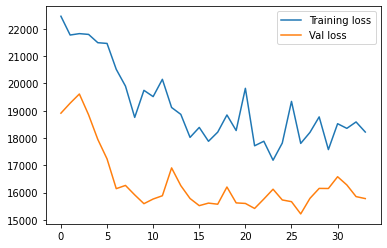

In [55]:
plt.plot(lstm_history.history['loss'], label="Training loss")
plt.plot(lstm_history.history['val_loss'], label="Val loss")
plt.legend()

### 4.8 Model Evaluation

In [56]:
lstm_train_pred = model_lstm.predict(X_train_series)
lstm_valid_pred = model_lstm.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_valid_pred)))

10/10 [==============================] - 0s 20ms/step
Train rmse: 23073.893909449576
Validation rmse: 25872.372294318942


In [57]:
length = len(lstm_valid_pred) 

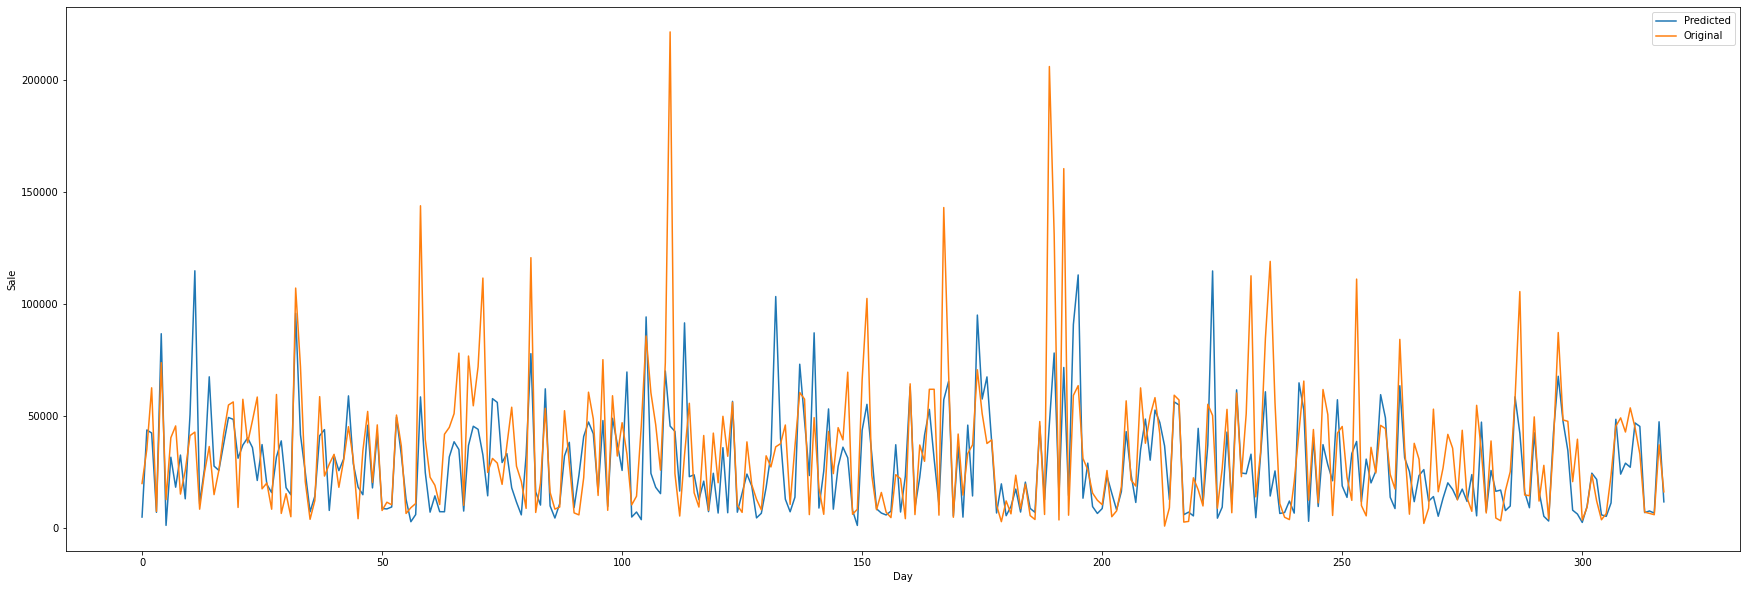

In [58]:
# data to be plotted
x = np.arange(0, length)
y1 = lstm_valid_pred[:length]
y2 = Y_valid[:length]

plt.figure(figsize=(30, 10))

# plotting
plt.xlabel("Day")
plt.ylabel("Sale")
plt.plot(x, y1.reshape(-1), label = "Predicted")
plt.plot(x, y2.reshape(-1), label = "Original")
plt.legend()
plt.show()

### 4.9 Test Model

In [59]:
lstm_test_pred = model_lstm.predict(X_test_series)
print('Test rmse:', np.sqrt(mean_squared_error(Y_test, lstm_test_pred)))

7/7 [==============================] - 0s 23ms/step
Test rmse: 25717.07423800874


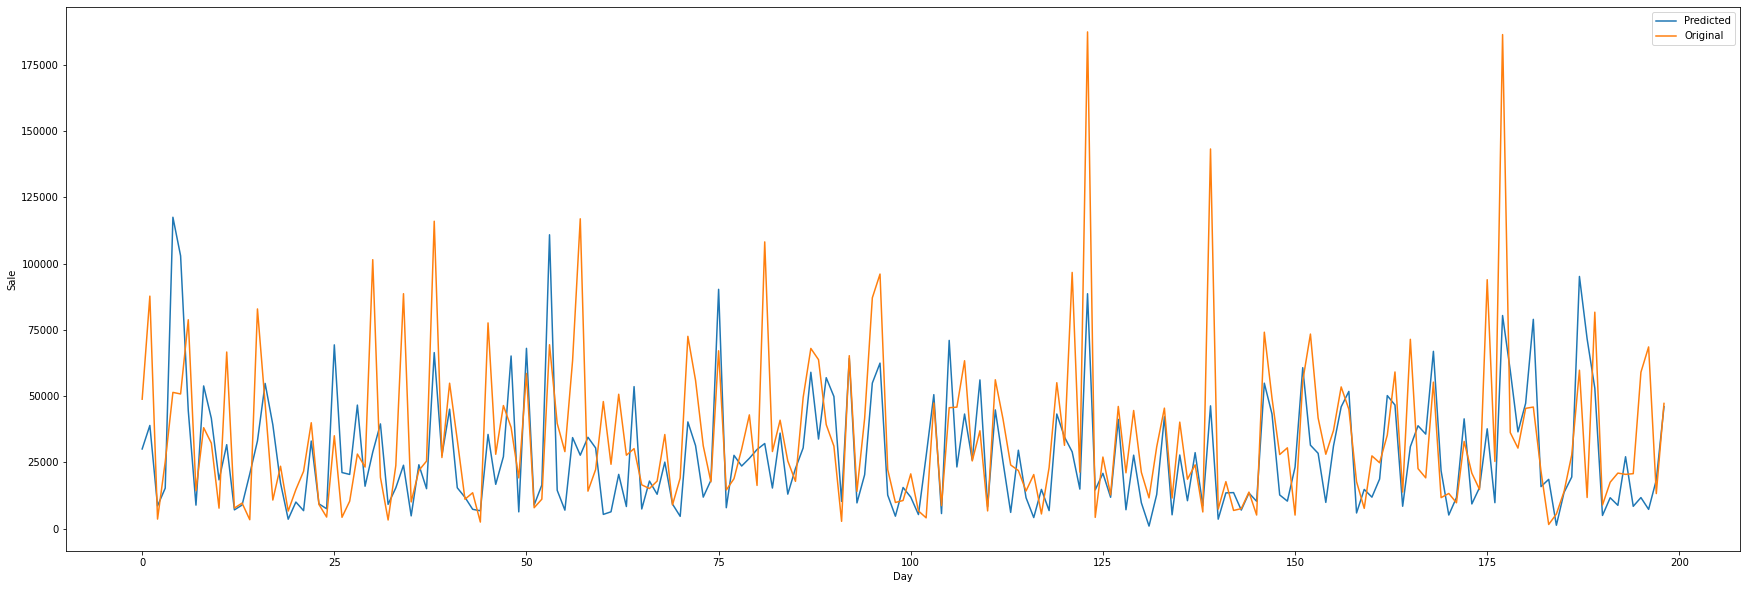

In [60]:
length_test = len(lstm_test_pred) 

x = np.arange(0, length_test)
y1 = lstm_test_pred[:length_test]
y2 = Y_test[:length_test]

plt.figure(figsize=(30, 10))

plt.xlabel("Day")
plt.ylabel("Sale")
plt.plot(x, y1.reshape(-1), label = "Predicted")
plt.plot(x, y2.reshape(-1), label = "Original")
plt.legend()
plt.show()

## 5. 🛍 Product Recommendation

Common types are... 

- popularity-based engines

- content-based engines: the recommendations are based on the description of the products.

- collaborative filtering engines: records from various users provide recommendations based on user similarities.

It depends on what kind of recommendation system you would love to make! 

In [61]:
recommend_df = new_df.copy()
recommend_df.drop(columns=['Datetime','OrderID','Gender','CategoryID'],inplace=True)
recommend_df.head()

,ProductID,CategoryCode,BrandID,USDPrice,UserID,Color,Metal,Gem
0,1842195256808833386,jewelry.earring,0.0,561.51,1.515916e+18,red,gold,diamond
1,1806829193678291446,other,-1,212.14,1.515916e+18,yellow,gold,unknown
2,1842214461889315556,jewelry.pendant,1.0,54.66,1.515916e+18,white,gold,sapphire
3,1835566849434059453,jewelry.pendant,0.0,88.90,1.515916e+18,red,gold,diamond
4,1873936840742928865,jewelry.necklace,0.0,417.67,1.515916e+18,red,gold,amethyst


In [63]:
recommend_df['Product features'] = recommend_df['CategoryCode']+' '+recommend_df['Color']+' '+recommend_df['Metal']+' '+recommend_df['Gem']

In [64]:
recommend_df.head()

,ProductID,CategoryCode,BrandID,USDPrice,UserID,Color,Metal,Gem,Product features
0,1842195256808833386,jewelry.earring,0,561.51,1.515916e+18,red,gold,diamond,jewelry.earring red gold diamond
1,1806829193678291446,other,-1,212.14,1.515916e+18,yellow,gold,unknown,other yellow gold unknown
2,1842214461889315556,jewelry.pendant,1,54.66,1.515916e+18,white,gold,sapphire,jewelry.pendant white gold sapphire
3,1835566849434059453,jewelry.pendant,0,88.9,1.515916e+18,red,gold,diamond,jewelry.pendant red gold diamond
4,1873936840742928865,jewelry.necklace,0,417.67,1.515916e+18,red,gold,amethyst,jewelry.necklace red gold amethyst


### Product Type & Features Popularity 

In [118]:
pd.DataFrame(recommend_df['Product features'].value_counts()).head(10)

,Product features
jewelry.ring red gold diamond,8667
other red gold unknown,7849
jewelry.earring red gold diamond,6528
jewelry.earring red gold fianit,4801
jewelry.earring red gold unknown,4097
jewelry.ring white gold diamond,4029
jewelry.ring red gold unknown,3934
jewelry.pendant red gold unknown,3709
jewelry.earring white gold diamond,2914
jewelry.ring red gold fianit,2888


### Products with same type

In [160]:
product_df = recommend_df[['ProductID','Product features','BrandID','USDPrice']]
product_df.drop_duplicates(inplace=True)

In [165]:
def recommend_same_type(x):
  typ = list(product_df[product_df['ProductID'] == x]['Product features'])[0]
  print('Product type you have just purchased is : ',typ)
  df = product_df[product_df['Product features'] == typ]
  df['USDPrice'] = df.USDPrice.astype(float)
  df.sort_values(by='USDPrice',inplace=True)
  print('....................................................')
  print('The average price of products with same type is : ', round(df.USDPrice.mean()),'USD')

  return df[df['ProductID']!=x]

recommend_same_type(1873936840742928865)


Product type you have just purchased is :  jewelry.necklace red gold amethyst
....................................................
The average price of products with same type is :  394 USD


,ProductID,Product features,BrandID,USDPrice
6139,1956663847708262866,jewelry.necklace red gold amethyst,0,273.84
657,1956663848295465908,jewelry.necklace red gold amethyst,0,356.03
1552,1956663840292733476,jewelry.necklace red gold amethyst,0,417.67
78190,1897215830605693504,jewelry.necklace red gold amethyst,1,506.71


### Content based (didnt work because its only giving products with the exact same type)

In [67]:
new_recommend_df = pd.pivot_table(recommend_df,
                                 index = ['UserID','ProductID','Product features'],
                                 values = 'BrandID',
                                 aggfunc = 'count' ).reset_index().fillna(0)

new_recommend_df.head()

,UserID,ProductID,Product features,BrandID
0,1.313554e+18,1956663836291367617,jewelry.ring yellow gold unknown,1
1,1.313556e+18,1515966223555347297,jewelry.ring red gold diamond,1
2,1.313556e+18,1783382225086054745,jewelry.earring red gold diamond,2
3,1.313556e+18,1956663831409197254,jewelry.pendant red gold diamond,1
4,1.313556e+18,1956663840242401751,jewelry.ring red gold unknown,1


In [75]:
content_based_df = new_recommend_df[['ProductID','Product features']]
content_based_df.drop_duplicates(subset='ProductID', keep="last", inplace=True)
print(content_based_df.shape)
content_based_df.head()

(8272, 2)


,ProductID,Product features
49,1839104725304213603,jewelry.necklace red gold diamond
50,1956663834236158332,jewelry.necklace red gold sapphire
52,2279080600545526596,jewelry.necklace white silver fianit
54,1515966223498287115,jewelry.earring unknown-color silver fianit
57,1956663845703385254,jewelry.pendant red gold diamond


In [76]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')


#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(content_based_df['Product features'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8272, 50)

In [77]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [79]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(content_based_df.index, index=content_based_df['ProductID']).drop_duplicates()

In [111]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    product_indices = [i[0] for i in sim_scores]

    product_list = list(content_based_df['ProductID'].iloc[product_indices])


    # Return the top 10 most similar movies
    return content_based_df.loc[content_based_df['ProductID'].isin(product_list)]

In [112]:
get_recommendations(1956663845703385254)

,ProductID,Product features
512,1515966223517304096,jewelry.pendant red gold unknown
938,1956663848152859386,jewelry.pendant red gold unknown
1527,1515966223467166402,jewelry.pendant red gold unknown
1592,1956663845820825938,jewelry.pendant red gold unknown
2600,1956663830738108692,jewelry.pendant red gold unknown
2748,1956663847389495297,jewelry.pendant red gold unknown
4068,1873265184479379768,jewelry.pendant red gold unknown
4220,1956663845611110437,jewelry.pendant red gold unknown
4739,1956663831174316887,jewelry.pendant red gold unknown
5346,1956663840242401759,jewelry.pendant red gold unknown
